In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec
from scipy.io import loadmat

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

session = cc.database.create_session()

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
input_path = '/g/data/e14/erd561/Australia_3/'

In [4]:
tau_x_z0_1_mod = xr.open_dataset(input_path + 'tau_x_z0_1_mod.nc').tau_x_z0_1_mod.sel(yu_ocean=slice(-77.5,20))
print(tau_x_z0_1_mod)
tau_x_z0_1_slope_mod = xr.open_dataset(input_path + 'tau_x_z0_1_slope_mod.nc').tau_x_z0_1_slope_mod*10
print(tau_x_z0_1_slope_mod)
tau_x_z0_1_p_value_mod = xr.open_dataset(input_path + 'tau_x_z0_1_p_value_mod.nc').tau_x_z0_1_p_value_mod
print(tau_x_z0_1_p_value_mod)
tau_x_z0_1_std_err_mod = xr.open_dataset(input_path + 'tau_x_z0_1_std_err_mod.nc').tau_x_z0_1_std_err_mod*10
print(tau_x_z0_1_std_err_mod)

tau_x_z0_025_mod = xr.open_dataset(input_path + 'tau_x_z0_025_mod.nc').tau_x_z0_025_mod
print(tau_x_z0_025_mod)
tau_x_z0_025_slope_mod = xr.open_dataset(input_path + 'tau_x_z0_025_slope_mod.nc').tau_x_z0_025_slope_mod*10
print(tau_x_z0_025_slope_mod)
tau_x_z0_025_p_value_mod = xr.open_dataset(input_path + 'tau_x_z0_025_p_value_mod.nc').tau_x_z0_025_p_value_mod
print(tau_x_z0_025_p_value_mod)
tau_x_z0_025_std_err_mod = xr.open_dataset(input_path + 'tau_x_z0_025_std_err_mod.nc').tau_x_z0_025_std_err_mod*10
print(tau_x_z0_025_std_err_mod)

tau_x_z0_01_mod = xr.open_dataset(input_path + 'tau_x_z0_01_mod.nc').tau_x_z0_01_mod
print(tau_x_z0_01_mod)
tau_x_z0_01_slope_mod = xr.open_dataset(input_path + 'tau_x_z0_01_slope_mod.nc').tau_x_z0_01_slope_mod*10
print(tau_x_z0_01_slope_mod)
tau_x_z0_01_p_value_mod = xr.open_dataset(input_path + 'tau_x_z0_01_p_value_mod.nc').tau_x_z0_01_p_value_mod
print(tau_x_z0_01_p_value_mod)
tau_x_z0_01_std_err_mod = xr.open_dataset(input_path + 'tau_x_z0_01_std_err_mod.nc').tau_x_z0_01_std_err_mod*10
print(tau_x_z0_01_std_err_mod)

<xarray.DataArray 'tau_x_z0_1_mod' (yu_ocean: 98, xu_ocean: 151, year: 25)>
[369950 values with dtype=float32]
Coordinates:
  * yu_ocean  (yu_ocean) float64 -77.01 -75.97 -74.86 ... 18.22 18.97 19.76
  * xu_ocean  (xu_ocean) float64 140.0 141.0 142.0 143.0 ... 288.0 289.0 290.0
  * year      (year) int64 1993 1994 1995 1996 1997 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'tau_x_z0_1_slope_mod' (yu_ocean: 101, xu_ocean: 151)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.00114094, -0.00155224, -0.00179845, ...,         nan,
                nan,         nan],
       [-0.00082458, -0.00109905, -0.00130999, ...,         nan,
                nan,         nan],
       [-0.00024085, -0.00033884, -0.00050818, ...,    

In [5]:
tau_y_z0_1_mod = xr.open_dataset(input_path + 'tau_y_z0_1_mod.nc').tau_y_z0_1_mod.sel(yu_ocean=slice(-77.5,20))
print(tau_y_z0_1_mod)
tau_y_z0_1_slope_mod = xr.open_dataset(input_path + 'tau_y_z0_1_slope_mod.nc').tau_y_z0_1_slope_mod*10
print(tau_y_z0_1_slope_mod)
tau_y_z0_1_p_value_mod = xr.open_dataset(input_path + 'tau_y_z0_1_p_value_mod.nc').tau_y_z0_1_p_value_mod
print(tau_y_z0_1_p_value_mod)
tau_y_z0_1_std_err_mod = xr.open_dataset(input_path + 'tau_y_z0_1_std_err_mod.nc').tau_y_z0_1_std_err_mod*10
print(tau_y_z0_1_std_err_mod)

tau_y_z0_025_mod = xr.open_dataset(input_path + 'tau_y_z0_025_mod.nc').tau_y_z0_025_mod
print(tau_y_z0_025_mod)
tau_y_z0_025_slope_mod = xr.open_dataset(input_path + 'tau_y_z0_025_slope_mod.nc').tau_y_z0_025_slope_mod*10
print(tau_y_z0_025_slope_mod)
tau_y_z0_025_p_value_mod = xr.open_dataset(input_path + 'tau_y_z0_025_p_value_mod.nc').tau_y_z0_025_p_value_mod
print(tau_y_z0_025_p_value_mod)
tau_y_z0_025_std_err_mod = xr.open_dataset(input_path + 'tau_y_z0_025_std_err_mod.nc').tau_y_z0_025_std_err_mod*10
print(tau_y_z0_025_std_err_mod)

tau_y_z0_01_mod = xr.open_dataset(input_path + 'tau_y_z0_01_mod.nc').tau_y_z0_01_mod
print(tau_y_z0_01_mod)
tau_y_z0_01_slope_mod = xr.open_dataset(input_path + 'tau_y_z0_01_slope_mod.nc').tau_y_z0_01_slope_mod*10
print(tau_y_z0_01_slope_mod)
tau_y_z0_01_p_value_mod = xr.open_dataset(input_path + 'tau_y_z0_01_p_value_mod.nc').tau_y_z0_01_p_value_mod
print(tau_y_z0_01_p_value_mod)
tau_y_z0_01_std_err_mod = xr.open_dataset(input_path + 'tau_y_z0_01_std_err_mod.nc').tau_y_z0_01_std_err_mod*10
print(tau_y_z0_01_std_err_mod)

<xarray.DataArray 'tau_y_z0_1_mod' (yu_ocean: 98, xu_ocean: 151, year: 25)>
[369950 values with dtype=float32]
Coordinates:
  * yu_ocean  (yu_ocean) float64 -77.01 -75.97 -74.86 ... 18.22 18.97 19.76
  * xu_ocean  (xu_ocean) float64 140.0 141.0 142.0 143.0 ... 288.0 289.0 290.0
  * year      (year) int64 1993 1994 1995 1996 1997 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'tau_y_z0_1_slope_mod' (yu_ocean: 101, xu_ocean: 151)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.00161263, -0.00115048, -0.00090967, ...,         nan,
                nan,         nan],
       [-0.00154056, -0.00093106, -0.00060639, ...,         nan,
                nan,         nan],
       [-0.00155064, -0.00077467, -0.00028963, ...,    

In [83]:
latS = -76.5
latN = 20
lonW = 140-360
lonE = 289-360

dxt_z0_1_mod = xr.open_dataset(
    '/g/data/hh5/tmp/cosima/access-om2/1deg_jra55v13_iaf_spinup1_B1/output059/ocean/ocean_grid.nc').\
dxt.\
sel(yt_ocean=arange(latS,latN,1), method='nearest').\
sel(xt_ocean=arange(lonW,lonE,1), method='nearest')
xt_ocean = dxt_z0_1_mod.xt_ocean
xt_ocean_corrected = xt_ocean + 360
dxt_z0_1_mod = dxt_z0_1_mod.assign_coords(xt_ocean=xt_ocean_corrected)

dyt_z0_1_mod = xr.open_dataset(
    '/g/data/hh5/tmp/cosima/access-om2/1deg_jra55v13_iaf_spinup1_B1/output059/ocean/ocean_grid.nc').\
dyt.\
sel(yt_ocean=arange(latS,latN,1), method='nearest').\
sel(xt_ocean=arange(lonW,lonE,1), method='nearest')
xt_ocean = dyt_z0_1_mod.xt_ocean
xt_ocean_corrected = xt_ocean + 360
dyt_z0_1_mod = dyt_z0_1_mod.assign_coords(xt_ocean=xt_ocean_corrected)

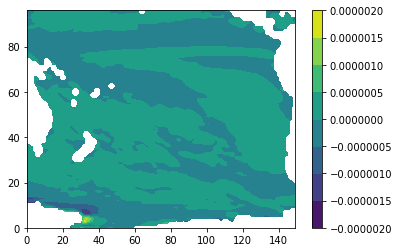

In [118]:
plt.contourf(tau_y_dxu[:,:,0])
plt.colorbar()

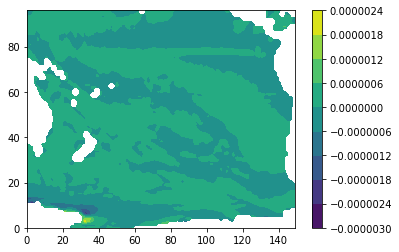

In [120]:
plt.contourf(tau_y_dxu[:,:,0] - tau_x_dyu[:,:,0])
plt.colorbar()

In [102]:
dtau_y = \
tau_y_z0_1_mod.interp(xu_ocean=dxt_z0_1_mod.xt_ocean).isel(yu_ocean=slice(1,98)).values - \
tau_y_z0_1_mod.interp(xu_ocean=dxt_z0_1_mod.xt_ocean).isel(yu_ocean=slice(0,97)).values
print(np.shape(dtau_y))
tau_y_dxu = dtau_y / dxt_z0_1_mod.expand_dims(dim='year', axis=2).values
print(np.shape(tau_y_dxu))

dtau_x = \
tau_x_z0_1_mod.interp(yu_ocean=dyt_z0_1_mod.yt_ocean).isel(xu_ocean=slice(1,151)).values - \
tau_x_z0_1_mod.interp(yu_ocean=dyt_z0_1_mod.yt_ocean).isel(xu_ocean=slice(0,150)).values
print(np.shape(dtau_x))
tau_x_dyu = dtau_x / dyt_z0_1_mod.expand_dims(dim='year', axis=2).values
print(np.shape(tau_x_dyu))

wind_curl_1_mod = tau_y_dxu - tau_x_dyu
print(np.shape(wind_curl_1_mod))

wind_curl = xr.DataArray(
    wind_curl_1_mod, 
    dims=('lat_1', 'lon_1', 'year'), 
    coords=[dxt_z0_1_mod.yt_ocean, dxt_z0_1_mod.xt_ocean, tau_y_z0_1_mod.year], 
    name='wind_curl')
print(wind_curl)

year = tau_y_z0_1_mod.year
lat_1_mod = wind_curl.lat_1
lon_1_mod = wind_curl.lon_1

wind_curl_1_trans_mod = wind_curl.transpose('year','lat_1','lon_1')
print(np.shape(wind_curl_1_trans_mod))
wind_curl_1_slope_mod = xr.DataArray(
    np.zeros([np.shape(lat_1_mod)[0], np.shape(lon_1_mod)[0]]), dims=(
    'lat_1', 'lon_1'), coords=[lat_1_mod, lon_1_mod], name='wind_curl_1')
wind_curl_1_p_value_mod = xr.DataArray(
    np.zeros([np.shape(lat_1_mod)[0], np.shape(lon_1_mod)[0]]), dims=(
    'lat_1', 'lon_1'), coords=[lat_1_mod, lon_1_mod], name='wind_curl_1')
wind_curl_1_std_err_mod = xr.DataArray(
    np.zeros([np.shape(lat_1_mod)[0], np.shape(lon_1_mod)[0]]), dims=(
    'lat_1', 'lon_1'), coords=[lat_1_mod, lon_1_mod], name='wind_curl_1')
for iid, i in enumerate(lat_1_mod):
    for jid, j in enumerate(lon_1_mod):
        wind_curl_1_slope_mod[iid, jid], _, _, wind_curl_1_p_value_mod[iid, jid], wind_curl_1_std_err_mod[iid, jid] = \
        stats.linregress(year, wind_curl_1_trans_mod[:, iid, jid])
    print('lat_1_mod ' + str(np.array(i)))
print(wind_curl_1_slope_mod)

(97, 150, 25)
(97, 150, 25)
(97, 150, 25)
(97, 150, 25)
(97, 150, 25)
<xarray.DataArray 'wind_curl' (lat_1: 97, lon_1: 150, year: 25)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,    

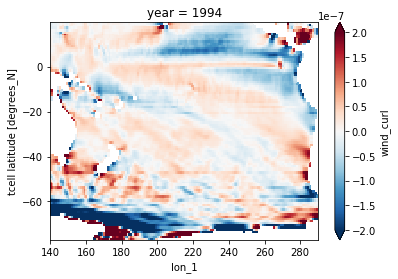

In [122]:
wind_curl.isel(year=1).plot(vmax=0.0000002)

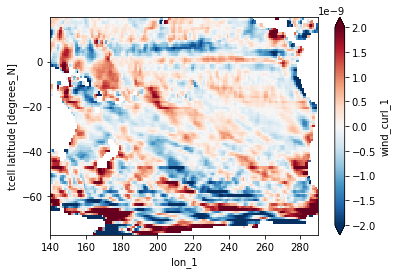

In [104]:
wind_curl_1_slope_mod.plot(vmax=0.000000002)

Bbox(x0=0.125, y0=0.5368181818181819, x1=0.47727272727272724, y1=0.88)
[0.125, 0.48681818181818187, 0.5272727272727272, 0.88]
Bbox(x0=0.5477272727272726, y0=0.5368181818181819, x1=0.8999999999999999, y1=0.88)
[0.6377272727272726, 0.48681818181818187, 1.04, 0.88]


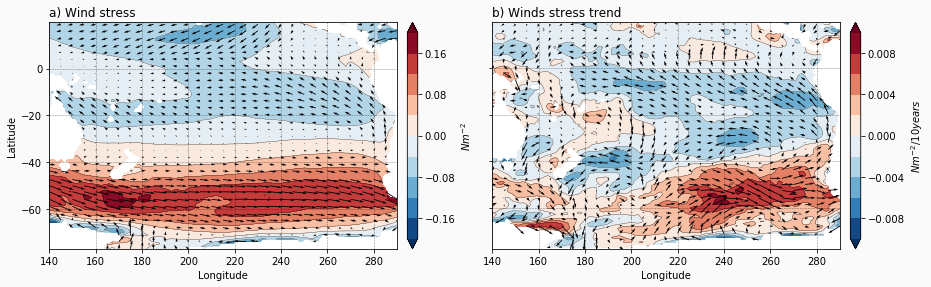

In [18]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


# land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
#                                     edgecolor='black',
#                                     facecolor='white',
#                                     linewidth=0.75)

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,8), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 10})    

row=2
col=2

central_longitude = 140

ax = plt.subplot(row, col, 1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
print(pos_plot)
levels=arange(-0.2,0.2,0.04)
cmap = plt.cm.RdBu_r
data = tau_x_z0_1_mod.mean('year')
plot = plt.contourf(data.xu_ocean, data.yu_ocean, data,
            cmap=cmap, levels=levels, extend='both')
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-')
n = 5
plt.quiver(
    data.xu_ocean[::n], 
    data.yu_ocean[::n-2], 
    tau_x_z0_1_mod.mean('year')[::n-2,::n], 
    tau_y_z0_1_mod.mean('year')[::n-2,::n])

ax.set_position(bbox(pos_plot))
ax.set_title('a) Wind stress', loc='left')
# ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="3%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.03, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$N m^{-2}$', cax=axins)

ax = plt.subplot(row, col, 2)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0-0.05, pos.x1+0.14, pos.y1]
print(pos_plot)
levels=arange(-0.01,0.01,0.002)
cmap = plt.cm.RdBu_r
data = tau_x_z0_1_slope_mod
plot = plt.contourf(data.xu_ocean, data.yu_ocean, data,
            cmap=cmap, levels=levels, extend='both')
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-')
n = 5
plt.quiver(
    data.xu_ocean[::n], 
    data.yu_ocean[::n-2], 
    tau_x_z0_1_slope_mod[::n-2,::n], 
    tau_y_z0_1_slope_mod[::n-2,::n])

# plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
ax.set_position(bbox(pos_plot))
ax.set_title('b) Winds stress trend', loc='left')
# ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="3%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.03, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$N m^{-2} /10 years$', cax=axins)

savefigure('Pacific_winds')